In [150]:
# import sys
# !{sys.executable} -m pip install netCDF4

In [68]:
import os
import re 
from glob import iglob
import pandas as pd
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
from sklearn import linear_model
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [93]:
base_path = '/Users/harnoor_dhingra/Desktop/SHC/Haryana/Ambala/Ambala/Adho Majra (278)/*.xml'
global_soil_database_df1 = pd.DataFrame()
soil_data_labels = ['SampleNo', 'SampleCollectionDate', 'LandArea', 'Irrigation', 'Longitude',
                    'Latitude', 'pH', 'EC', 'Organic Carbon (OC)', 'Available Nitrogen (N)', 
                    'Available Phosphorus (P)', 'Available Potassium (K)', 'Available Sulphur (S)',
                    'Available Zinc (Zn)', 'Available Boron (B)', 'Available Iron (Fe)', 
                    'Available Manganese (Mn)', 'Available Copper (Cu)']
soil_database_df1 = pd.DataFrame(columns=soil_data_labels)

In [94]:
for file_path in iglob(base_path, recursive=True):
    tree = ET.parse(file_path)
    root = tree.getroot()
    display_iter = root.iter('{SoilHealthCard}Details1')
    
    shc_info = next(display_iter)
    GeoPosition = shc_info.get('Textbox6')
    pattern = '\d+\.\d+'
    location = re.findall(pattern, GeoPosition)
    sample_data = [shc_info.get('Sample_No'), shc_info.get('Sample_Collection_Date')
            ,shc_info.get('Land_Area'),shc_info.get('Irrigation_Rainfed1'),location[0], location[1]]
    display_iter = display_iter.__iter__()
    for temp_test_data in display_iter:
        sample_data.append(temp_test_data.get("TestValue1"))
    
    soil_database_df1 = soil_database_df1.append(pd.DataFrame([sample_data], columns=soil_data_labels),ignore_index=True)
display(soil_database_df1)

,SampleNo,SampleCollectionDate,LandArea,Irrigation,Longitude,Latitude,pH,EC,Organic Carbon (OC),Available Nitrogen (N),Available Phosphorus (P),Available Potassium (K),Available Sulphur (S),Available Zinc (Zn),Available Boron (B),Available Iron (Fe),Available Manganese (Mn),Available Copper (Cu)
0,HR/2016-17/39539776/4,03-11-2016,None,Irrigated(Tube well),31.312501,77.551390,7.90,0.16,0.30,--,11.57,57.60,23.80,0.82,--,11.12,1.13,0.26
1,HR/2016-17/39543852/2,03-11-2016,None,Irrigated(Tube well),31.280279,77.498612,8.00,0.14,0.31,--,10.08,35.08,12.54,0.46,--,11.36,1.09,0.15
2,HR/2016-17/39564400/1,03-11-2016,None,Irrigated(Tube well),30.884723,78.112501,8.00,0.13,0.40,--,14.60,60.12,25.06,0.98,--,12.22,1.10,0.33
3,HR/2016-17/39500969/4,02-11-2016,None,Irrigated(Tube well),32.388335,77.688334,7.50,0.30,0.27,--,8.54,71.26,30.63,1.57,--,14.61,1.85,0.44
4,HR/2016-17/39510961/1,02-11-2016,None,Irrigated(Tube well),31.311945,77.637779,7.90,0.15,0.25,--,11.48,114.06,52.03,2.00,--,16.41,1.41,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,HR/2016-17/39586061/3,04-11-2016,None,Irrigated(Tube well),30.367500,77.453334,8.00,0.13,0.49,--,14.01,88.04,39.02,1.27,--,9.99,1.65,0.41
253,HR/2016-17/39494048/3,02-11-2016,None,Irrigated(Tube well),31.613612,77.361667,7.20,0.15,0.63,--,15.50,134.90,62.45,2.75,--,12.39,1.44,0.85
254,HR/2016-17/39539132/3,03-11-2016,None,Irrigated(Tube well),32.162224,77.365556,8.60,0.57,0.43,--,19.17,130.52,60.26,2.12,--,15.80,1.55,0.72
255,HR/2016-17/39500969/1,02-11-2016,None,Irrigated(Tube well),32.388335,77.688334,7.50,0.30,0.27,--,8.54,71.26,30.63,1.57,--,14.61,1.85,0.44


In [95]:
base_path = '/Users/harnoor_dhingra/Desktop/SHC/Haryana/Ambala/Ambala/Ahema (175)/*.xml'
global_soil_database_df2 = pd.DataFrame()
soil_data_labels = ['SampleNo', 'SampleCollectionDate', 'LandArea', 'Irrigation', 'Longitude',
                    'Latitude', 'pH', 'EC', 'Organic Carbon (OC)', 'Available Nitrogen (N)', 
                    'Available Phosphorus (P)', 'Available Potassium (K)', 'Available Sulphur (S)',
                    'Available Zinc (Zn)', 'Available Boron (B)', 'Available Iron (Fe)', 
                    'Available Manganese (Mn)', 'Available Copper (Cu)']
soil_database_df2 = pd.DataFrame(columns=soil_data_labels)

In [96]:
for file_path in iglob(base_path, recursive=True):
    tree = ET.parse(file_path)
    root = tree.getroot()
    display_iter = root.iter('{SoilHealthCard}Details1')
    
    shc_info = next(display_iter)
    GeoPosition = shc_info.get('Textbox6')
    pattern = '\d+\.\d+'
    location = re.findall(pattern, GeoPosition)
    sample_data = [shc_info.get('Sample_No'), shc_info.get('Sample_Collection_Date')
            ,shc_info.get('Land_Area'),shc_info.get('Irrigation_Rainfed1'),location[0], location[1]]
    display_iter = display_iter.__iter__()
    for temp_test_data in display_iter:
        sample_data.append(temp_test_data.get("TestValue1"))
    
    soil_database_df2 = soil_database_df2.append(pd.DataFrame([sample_data], columns=soil_data_labels),ignore_index=True)
display(soil_database_df2)

,SampleNo,SampleCollectionDate,LandArea,Irrigation,Longitude,Latitude,pH,EC,Organic Carbon (OC),Available Nitrogen (N),Available Phosphorus (P),Available Potassium (K),Available Sulphur (S),Available Zinc (Zn),Available Boron (B),Available Iron (Fe),Available Manganese (Mn),Available Copper (Cu)
0,HR/2016-17/39540120/2,24-11-2016,None,Irrigated(Tube well),30.543334,77.944723,8.10,0.11,0.21,--,14.25,138.86,44.10,1.70,--,7.00,0.76,0.58
1,HR/2016-17/39504909/2,21-11-2016,None,Irrigated(Tube well),31.137779,77.846946,7.90,0.20,0.42,--,13.31,146.88,32.08,1.51,--,7.70,1.01,0.47
2,HR/2018-19/131160295/3,27-10-2018,1.00 Acre,Irrigated(Tube well),30.543236,76.551528,8.10,0.17,0.47,--,10.43,144.26,12.73,0.47,0.11,7.64,5.02,0.62
3,HR/2016-17/39530185/4,22-11-2016,None,Irrigated(Tube well),31.017501,77.011667,7.50,0.15,0.64,--,13.53,109.16,38.47,1.76,--,6.82,0.72,0.57
4,HR/2016-17/39493953/3,21-11-2016,None,Irrigated(Tube well),31.511390,76.879445,7.40,0.19,0.31,--,13.01,98.48,33.45,1.63,--,7.28,0.91,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,HR/2016-17/39535592/3,24-11-2016,None,Irrigated(Tube well),30.978612,78.148612,8.00,0.33,0.43,--,11.46,111.56,28.16,1.34,--,6.00,0.59,0.44
289,HR/2016-17/39507910/3,22-11-2016,None,Irrigated(Tube well),31.248056,78.316946,7.90,0.23,0.43,--,13.49,137.96,29.95,1.50,--,8.22,1.04,0.48
290,HR/2016-17/39504466/1,21-11-2016,None,Irrigated(Tube well),31.182779,77.816112,8.20,0.18,0.51,--,15.30,129.93,43.32,2.05,--,9.54,1.22,0.67
291,HR/2016-17/39500803/2,21-11-2016,None,Irrigated(Tube well),31.256945,76.701111,8.10,0.23,0.49,--,14.82,164.03,50.67,2.22,--,7.42,1.12,0.72


In [97]:
base_path = '/Users/harnoor_dhingra/Desktop/SHC/Haryana/Ambala/Ambala/Alauddin Majra (301)/*.xml'
global_soil_database_df3 = pd.DataFrame()
soil_data_labels = ['SampleNo', 'SampleCollectionDate', 'LandArea', 'Irrigation', 'Longitude',
                    'Latitude', 'pH', 'EC', 'Organic Carbon (OC)', 'Available Nitrogen (N)', 
                    'Available Phosphorus (P)', 'Available Potassium (K)', 'Available Sulphur (S)',
                    'Available Zinc (Zn)', 'Available Boron (B)', 'Available Iron (Fe)', 
                    'Available Manganese (Mn)', 'Available Copper (Cu)']
soil_database_df3 = pd.DataFrame(columns=soil_data_labels)

In [98]:
for file_path in iglob(base_path, recursive=True):
    tree = ET.parse(file_path)
    root = tree.getroot()
    display_iter = root.iter('{SoilHealthCard}Details1')
    
    shc_info = next(display_iter)
    GeoPosition = shc_info.get('Textbox6')
    pattern = '\d+\.\d+'
    location = re.findall(pattern, GeoPosition)
    sample_data = [shc_info.get('Sample_No'), shc_info.get('Sample_Collection_Date')
            ,shc_info.get('Land_Area'),shc_info.get('Irrigation_Rainfed1'),location[0], location[1]]
    display_iter = display_iter.__iter__()
    for temp_test_data in display_iter:
        sample_data.append(temp_test_data.get("TestValue1"))
    
    soil_database_df3 = soil_database_df3.append(pd.DataFrame([sample_data], columns=soil_data_labels),ignore_index=True)
display(soil_database_df3)

,SampleNo,SampleCollectionDate,LandArea,Irrigation,Longitude,Latitude,pH,EC,Organic Carbon (OC),Available Nitrogen (N),Available Phosphorus (P),Available Potassium (K),Available Sulphur (S),Available Zinc (Zn),Available Boron (B),Available Iron (Fe),Available Manganese (Mn),Available Copper (Cu)
0,HR/2018-19/130897715/1,10-07-2018,8.00 Acre,Irrigated(Tube well),30.242335,76.678739,8.29,0.70,0.48,--,12.93,1021.44,60.57,0.87,0.28,7.93,2.91,2.09
1,HR/2018-19/130900911/1,10-07-2018,6.50 Acre,Irrigated(Tube well),30.249108,76.678910,7.97,0.35,0.56,--,28.34,98.72,28.38,5.07,1.07,19.02,0.50,1.80
2,HR/2018-19/130889879/1,10-07-2018,6.50 Acre,Irrigated(Tube well),30.237294,76.669552,8.56,0.45,0.56,--,23.52,181.73,8.69,2.32,0.29,19.42,0.52,5.37
3,HR/2018-19/130901012/1,10-07-2018,6.50 Acre,Irrigated(Tube well),30.240391,76.675497,7.81,0.46,0.58,--,33.13,151.47,24.71,5.08,1.02,20.86,0.59,1.83
4,HR/2018-19/130900911/1,10-07-2018,6.50 Acre,Irrigated(Tube well),30.249108,76.678910,7.97,0.35,0.56,--,28.34,98.72,28.38,5.07,1.07,19.02,0.50,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,HR/2018-19/130898603/1,10-07-2018,8.00 Acre,Irrigated(Tube well),30.243272,76.684004,7.52,0.46,0.53,--,24.84,95.11,23.95,3.93,1.22,15.93,0.46,1.35
57,HR/2018-19/130900117/1,10-07-2018,8.00 Acre,Irrigated(Tube well),30.241941,76.681844,8.17,0.35,0.43,--,36.53,216.43,289.66,2.68,0.69,9.63,6.09,2.11
58,HR/2018-19/130903218/1,10-07-2018,6.50 Acre,Irrigated(Tube well),30.240391,76.675497,7.94,0.42,0.56,--,36.78,391.84,139.23,6.04,0.77,20.02,3.10,2.63
59,HR/2018-19/130900707/1,10-07-2018,6.50 Acre,Irrigated(Tube well),30.245085,76.678930,7.56,0.46,0.55,--,36.58,286.00,137.68,5.89,0.90,20.08,2.62,2.45


In [99]:
base_path = '/Users/harnoor_dhingra/Desktop/SHC/Haryana/Ambala/Ambala/Amipur (258)/*.xml'
global_soil_database_df4 = pd.DataFrame()
soil_data_labels = ['SampleNo', 'SampleCollectionDate', 'LandArea', 'Irrigation', 'Longitude',
                    'Latitude', 'pH', 'EC', 'Organic Carbon (OC)', 'Available Nitrogen (N)', 
                    'Available Phosphorus (P)', 'Available Potassium (K)', 'Available Sulphur (S)',
                    'Available Zinc (Zn)', 'Available Boron (B)', 'Available Iron (Fe)', 
                    'Available Manganese (Mn)', 'Available Copper (Cu)']
soil_database_df4 = pd.DataFrame(columns=soil_data_labels)

In [100]:
for file_path in iglob(base_path, recursive=True):
    tree = ET.parse(file_path)
    root = tree.getroot()
    display_iter = root.iter('{SoilHealthCard}Details1')
    
    shc_info = next(display_iter)
    GeoPosition = shc_info.get('Textbox6')
    pattern = '\d+\.\d+'
    location = re.findall(pattern, GeoPosition)
    sample_data = [shc_info.get('Sample_No'), shc_info.get('Sample_Collection_Date')
            ,shc_info.get('Land_Area'),shc_info.get('Irrigation_Rainfed1'),location[0], location[1]]
    display_iter = display_iter.__iter__()
    for temp_test_data in display_iter:
        sample_data.append(temp_test_data.get("TestValue1"))
    
    soil_database_df4 = soil_database_df4.append(pd.DataFrame([sample_data], columns=soil_data_labels),ignore_index=True)
display(soil_database_df4)

,SampleNo,SampleCollectionDate,LandArea,Irrigation,Longitude,Latitude,pH,EC,Organic Carbon (OC),Available Nitrogen (N),Available Phosphorus (P),Available Potassium (K),Available Sulphur (S),Available Zinc (Zn),Available Boron (B),Available Iron (Fe),Available Manganese (Mn),Available Copper (Cu)
0,HR/2016-17/77991435/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,7.70,0.21,0.33,--,26.88,146.12,21.26,1.62,--,92.99,2.48,2.21
1,HR/2016-17/77991353/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,7.30,0.19,0.30,--,1.35,113.83,13.21,0.71,--,55.76,5.50,0.65
2,HR/2016-17/77991482/2,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,7.90,0.38,0.30,--,16.46,276.86,127.10,4.38,--,54.15,4.42,4.66
3,HR/2016-17/77991421/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,7.90,0.17,0.40,--,22.53,185.84,38.72,1.18,--,56.30,1.45,2.52
4,HR/2016-17/77991409/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,7.20,0.15,0.30,--,26.35,18.97,144.40,3.60,--,15.43,9.67,2.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,HR/2016-17/77991570/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,7.70,0.24,0.30,--,2.98,252.00,6.79,2.48,--,34.44,11.81,4.31
256,HR/2016-17/77991558/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.30,0.32,0.40,--,2.75,32.77,146.30,1.70,--,55.33,4.65,5.65
257,HR/2018-19/134293649/3,20-04-2018,8.00 Acre,Irrigated(Tube well),30.170022,76.604304,8.40,0.27,0.18,--,14.30,94.48,1.94,0.56,--,5.22,0.78,1.09
258,HR/2016-17/77991376/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,7.00,0.16,0.25,--,7.69,19.82,19.37,0.65,--,55.76,3.15,0.33


In [101]:
base_path = '/Users/harnoor_dhingra/Desktop/SHC/Haryana/Ambala/Ambala/Anandpur Jalbera (121)/*.xml'
global_soil_database_df5 = pd.DataFrame()
soil_data_labels = ['SampleNo', 'SampleCollectionDate', 'LandArea', 'Irrigation', 'Longitude',
                    'Latitude', 'pH', 'EC', 'Organic Carbon (OC)', 'Available Nitrogen (N)', 
                    'Available Phosphorus (P)', 'Available Potassium (K)', 'Available Sulphur (S)',
                    'Available Zinc (Zn)', 'Available Boron (B)', 'Available Iron (Fe)', 
                    'Available Manganese (Mn)', 'Available Copper (Cu)']
soil_database_df5 = pd.DataFrame(columns=soil_data_labels)

In [102]:
for file_path in iglob(base_path, recursive=True):
    tree = ET.parse(file_path)
    root = tree.getroot()
    display_iter = root.iter('{SoilHealthCard}Details1')
    
    shc_info = next(display_iter)
    GeoPosition = shc_info.get('Textbox6')
    pattern = '\d+\.\d+'
    location = re.findall(pattern, GeoPosition)
    sample_data = [shc_info.get('Sample_No'), shc_info.get('Sample_Collection_Date')
            ,shc_info.get('Land_Area'),shc_info.get('Irrigation_Rainfed1'),location[0], location[1]]
    display_iter = display_iter.__iter__()
    for temp_test_data in display_iter:
        sample_data.append(temp_test_data.get("TestValue1"))
    
    soil_database_df5 = soil_database_df5.append(pd.DataFrame([sample_data], columns=soil_data_labels),ignore_index=True)
display(soil_database_df5)

,SampleNo,SampleCollectionDate,LandArea,Irrigation,Longitude,Latitude,pH,EC,Organic Carbon (OC),Available Nitrogen (N),Available Phosphorus (P),Available Potassium (K),Available Sulphur (S),Available Zinc (Zn),Available Boron (B),Available Iron (Fe),Available Manganese (Mn),Available Copper (Cu)
0,HR/2016-17/42205661/1,30-06-2016,None,Irrigated(Tube well),30.478056,77.024723,7.70,0.40,0.51,--,12.63,32.28,14.64,1.09,--,--,--,0.49
1,HR/2016-17/42205885/1,30-06-2016,None,Irrigated(Tube well),30.478334,77.001111,8.10,0.47,0.49,--,6.59,52.26,21.23,1.74,--,--,--,0.71
2,HR/2016-17/42214744/1,30-06-2016,None,Irrigated(Tube well),30.441389,76.965834,8.10,2.90,0.40,--,8.23,53.80,88.73,1.94,--,--,--,0.66
3,HR/2016-17/42213171/2,30-06-2016,None,Irrigated(Tube well),30.442222,76.901945,7.40,1.70,0.68,--,9.36,55.64,102.90,1.84,--,--,--,0.58
4,HR/2016-17/42221258/1,01-07-2016,None,Irrigated(Tube well),30.416945,76.800834,8.10,3.80,0.42,--,8.69,--,9.04,1.33,--,--,--,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,HR/2016-17/42212685/2,30-06-2016,None,Irrigated(Tube well),30.460556,76.881667,7.80,0.95,0.67,--,5.23,101.52,148.30,2.83,--,--,--,1.11
96,HR/2016-17/42219577/2,01-07-2016,None,Irrigated(Tube well),30.405000,76.847500,7.70,0.79,0.52,--,12.36,--,41.49,1.40,--,--,--,1.35
97,HR/2016-17/42209793/3,30-06-2016,None,Irrigated(Tube well),30.442500,76.778333,7.90,3.30,0.33,--,12.02,36.54,128.10,2.07,--,--,--,0.47
98,HR/2016-17/42220409/3,01-07-2016,None,Irrigated(Tube well),30.387778,76.839722,7.90,2.80,0.55,--,12.05,--,30.72,0.62,--,--,--,0.70


In [103]:
base_path = '/Users/harnoor_dhingra/Desktop/SHC/Haryana/Ambala/Ambala/Babaheri (165)/*.xml'
global_soil_database_df6 = pd.DataFrame()
soil_data_labels = ['SampleNo', 'SampleCollectionDate', 'LandArea', 'Irrigation', 'Longitude',
                    'Latitude', 'pH', 'EC', 'Organic Carbon (OC)', 'Available Nitrogen (N)', 
                    'Available Phosphorus (P)', 'Available Potassium (K)', 'Available Sulphur (S)',
                    'Available Zinc (Zn)', 'Available Boron (B)', 'Available Iron (Fe)', 
                    'Available Manganese (Mn)', 'Available Copper (Cu)']
soil_database_df6 = pd.DataFrame(columns=soil_data_labels)

In [104]:
for file_path in iglob(base_path, recursive=True):
    tree = ET.parse(file_path)
    root = tree.getroot()
    display_iter = root.iter('{SoilHealthCard}Details1')
    
    shc_info = next(display_iter)
    GeoPosition = shc_info.get('Textbox6')
    pattern = '\d+\.\d+'
    location = re.findall(pattern, GeoPosition)
    sample_data = [shc_info.get('Sample_No'), shc_info.get('Sample_Collection_Date')
            ,shc_info.get('Land_Area'),shc_info.get('Irrigation_Rainfed1'),location[0], location[1]]
    display_iter = display_iter.__iter__()
    for temp_test_data in display_iter:
        sample_data.append(temp_test_data.get("TestValue1"))
    
    soil_database_df6 = soil_database_df6.append(pd.DataFrame([sample_data], columns=soil_data_labels),ignore_index=True)
display(soil_database_df6)

,SampleNo,SampleCollectionDate,LandArea,Irrigation,Longitude,Latitude,pH,EC,Organic Carbon (OC),Available Nitrogen (N),Available Phosphorus (P),Available Potassium (K),Available Sulphur (S),Available Zinc (Zn),Available Boron (B),Available Iron (Fe),Available Manganese (Mn),Available Copper (Cu)
0,HR/2016-17/38063952/2,13-11-2016,None,Irrigated(Tube well),30.658056,77.265556,8.90,0.42,0.15,--,110.77,658.78,255.30,3.19,--,3.64,0.65,--
1,HR/2016-17/38064891/1,13-11-2016,None,Irrigated(Tube well),30.657778,77.432778,8.40,0.73,0.19,--,95.02,634.59,275.70,3.29,--,2.73,0.96,--
2,HR/2016-17/38064564/2,13-11-2016,None,Irrigated(Tube well),30.712778,77.437501,7.90,0.10,0.27,--,112.16,605.47,360.60,4.05,--,3.57,0.95,--
3,HR/2016-17/38002304/2,13-11-2016,None,Irrigated(Tube well),31.538890,77.318612,8.00,0.65,0.30,--,100.82,649.15,436.80,4.39,--,3.84,1.00,--
4,HR/2016-17/38064664/1,13-11-2016,None,Irrigated(Tube well),30.740834,77.465556,8.20,0.86,0.30,--,125.75,479.81,282.90,3.07,--,3.15,0.66,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,HR/2016-17/38004575/1,13-11-2016,None,Irrigated(Tube well),30.600556,77.163056,8.40,0.10,0.22,--,122.06,486.75,371.40,4.71,--,3.58,1.01,--
62,HR/2016-17/38064478/1,13-11-2016,None,Irrigated(Tube well),30.741112,77.406945,8.60,0.64,0.27,--,114.60,536.26,363.40,3.68,--,3.80,0.86,--
63,HR/2016-17/38005905/1,13-11-2016,None,Irrigated(Tube well),30.773056,77.269167,8.40,0.81,0.22,--,22.65,270.14,419.80,2.76,--,12.97,0.46,--
64,HR/2016-17/38002660/4,13-11-2016,None,Irrigated(Tube well),31.566668,77.346945,8.10,0.98,0.16,--,103.38,573.89,309.20,4.38,--,3.60,1.01,--


In [105]:
base_path = '/Users/harnoor_dhingra/Desktop/SHC/Haryana/Ambala/Ambala/Baknaur (282)/*.xml'
global_soil_database_df7 = pd.DataFrame()
soil_data_labels = ['SampleNo', 'SampleCollectionDate', 'LandArea', 'Irrigation', 'Longitude',
                    'Latitude', 'pH', 'EC', 'Organic Carbon (OC)', 'Available Nitrogen (N)', 
                    'Available Phosphorus (P)', 'Available Potassium (K)', 'Available Sulphur (S)',
                    'Available Zinc (Zn)', 'Available Boron (B)', 'Available Iron (Fe)', 
                    'Available Manganese (Mn)', 'Available Copper (Cu)']
soil_database_df7 = pd.DataFrame(columns=soil_data_labels)

In [106]:
for file_path in iglob(base_path, recursive=True):
    tree = ET.parse(file_path)
    root = tree.getroot()
    display_iter = root.iter('{SoilHealthCard}Details1')
    
    shc_info = next(display_iter)
    GeoPosition = shc_info.get('Textbox6')
    pattern = '\d+\.\d+'
    location = re.findall(pattern, GeoPosition)
    sample_data = [shc_info.get('Sample_No'), shc_info.get('Sample_Collection_Date')
            ,shc_info.get('Land_Area'),shc_info.get('Irrigation_Rainfed1'),location[0], location[1]]
    display_iter = display_iter.__iter__()
    for temp_test_data in display_iter:
        sample_data.append(temp_test_data.get("TestValue1"))
    
    soil_database_df7 = soil_database_df7.append(pd.DataFrame([sample_data], columns=soil_data_labels),ignore_index=True)
display(soil_database_df7)

,SampleNo,SampleCollectionDate,LandArea,Irrigation,Longitude,Latitude,pH,EC,Organic Carbon (OC),Available Nitrogen (N),Available Phosphorus (P),Available Potassium (K),Available Sulphur (S),Available Zinc (Zn),Available Boron (B),Available Iron (Fe),Available Manganese (Mn),Available Copper (Cu)
0,HR/2016-17/77991676/3,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,7.80,0.22,0.28,--,2.42,147.94,981.50,1.24,--,23.61,3.18,1.62
1,HR/2016-17/77991679/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.00,0.25,0.30,--,26.80,163.21,888.10,1.76,--,3.62,2.72,1.43
2,HR/2016-17/77991676/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,7.80,0.22,0.28,--,2.42,147.94,981.50,1.24,--,23.61,3.18,1.62
3,HR/2016-17/77991676/2,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,7.80,0.22,0.28,--,2.42,147.94,981.50,1.24,--,23.61,3.18,1.62


In [107]:
base_path = '/Users/harnoor_dhingra/Desktop/SHC/Haryana/Ambala/Ambala/Balana (173)/*.xml'
global_soil_database_df8 = pd.DataFrame()
soil_data_labels = ['SampleNo', 'SampleCollectionDate', 'LandArea', 'Irrigation', 'Longitude',
                    'Latitude', 'pH', 'EC', 'Organic Carbon (OC)', 'Available Nitrogen (N)', 
                    'Available Phosphorus (P)', 'Available Potassium (K)', 'Available Sulphur (S)',
                    'Available Zinc (Zn)', 'Available Boron (B)', 'Available Iron (Fe)', 
                    'Available Manganese (Mn)', 'Available Copper (Cu)']
soil_database_df8 = pd.DataFrame(columns=soil_data_labels)

In [108]:
for file_path in iglob(base_path, recursive=True):
    tree = ET.parse(file_path)
    root = tree.getroot()
    display_iter = root.iter('{SoilHealthCard}Details1')
    
    shc_info = next(display_iter)
    GeoPosition = shc_info.get('Textbox6')
    pattern = '\d+\.\d+'
    location = re.findall(pattern, GeoPosition)
    sample_data = [shc_info.get('Sample_No'), shc_info.get('Sample_Collection_Date')
            ,shc_info.get('Land_Area'),shc_info.get('Irrigation_Rainfed1'),location[0], location[1]]
    display_iter = display_iter.__iter__()
    for temp_test_data in display_iter:
        sample_data.append(temp_test_data.get("TestValue1"))
    
    soil_database_df8 = soil_database_df8.append(pd.DataFrame([sample_data], columns=soil_data_labels),ignore_index=True)
display(soil_database_df8)

,SampleNo,SampleCollectionDate,LandArea,Irrigation,Longitude,Latitude,pH,EC,Organic Carbon (OC),Available Nitrogen (N),Available Phosphorus (P),Available Potassium (K),Available Sulphur (S),Available Zinc (Zn),Available Boron (B),Available Iron (Fe),Available Manganese (Mn),Available Copper (Cu)
0,HR/2016-17/77992395/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.10,0.46,0.27,--,22.62,172.82,15.52,2.61,--,152.20,4.85,2.79
1,HR/2016-17/77992330/2,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.20,0.42,0.30,--,19.17,467.70,9.28,0.81,--,332.20,4.42,8.85
2,HR/2016-17/77992381/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.30,0.44,0.28,--,0.24,113.20,0.38,0.42,--,283.10,0.49,0.33
3,HR/2016-17/77992344/3,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.20,0.32,0.22,--,14.56,162.21,11.44,1.76,--,143.50,4.39,2.24
4,HR/2016-17/77992356/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.20,0.42,0.27,--,9.12,119.25,7.46,1.95,--,55.76,3.15,1.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,HR/2016-17/77992377/3,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.10,0.48,0.25,--,7.13,136.23,6.38,0.92,--,71.33,2.86,1.13
254,HR/2016-17/77992372/2,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.40,0.40,0.33,--,8.58,117.61,7.17,1.99,--,45.26,1.36,0.68
255,HR/2016-17/77992412/4,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.10,0.48,0.25,--,19.20,161.78,12.34,1.41,--,221.90,4.43,2.88
256,HR/2016-17/77992549/3,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.30,0.37,0.25,--,28.83,373.40,5.60,6.30,--,187.30,2.93,7.29


In [111]:
base_path = '/Users/harnoor_dhingra/Desktop/SHC/Haryana/Ambala/Ambala/Bamba (302)/*.xml'
global_soil_database_df9 = pd.DataFrame()
soil_data_labels = ['SampleNo', 'SampleCollectionDate', 'LandArea', 'Irrigation', 'Longitude',
                    'Latitude', 'pH', 'EC', 'Organic Carbon (OC)', 'Available Nitrogen (N)', 
                    'Available Phosphorus (P)', 'Available Potassium (K)', 'Available Sulphur (S)',
                    'Available Zinc (Zn)', 'Available Boron (B)', 'Available Iron (Fe)', 
                    'Available Manganese (Mn)', 'Available Copper (Cu)']
soil_database_df9 = pd.DataFrame(columns=soil_data_labels)

In [112]:
for file_path in iglob(base_path, recursive=True):
    tree = ET.parse(file_path)
    root = tree.getroot()
    display_iter = root.iter('{SoilHealthCard}Details1')
    
    shc_info = next(display_iter)
    GeoPosition = shc_info.get('Textbox6')
    pattern = '\d+\.\d+'
    location = re.findall(pattern, GeoPosition)
    sample_data = [shc_info.get('Sample_No'), shc_info.get('Sample_Collection_Date')
            ,shc_info.get('Land_Area'),shc_info.get('Irrigation_Rainfed1'),location[0], location[1]]
    display_iter = display_iter.__iter__()
    for temp_test_data in display_iter:
        sample_data.append(temp_test_data.get("TestValue1"))
    
    soil_database_df9 = soil_database_df9.append(pd.DataFrame([sample_data], columns=soil_data_labels),ignore_index=True)
display(soil_database_df9)

,SampleNo,SampleCollectionDate,LandArea,Irrigation,Longitude,Latitude,pH,EC,Organic Carbon (OC),Available Nitrogen (N),Available Phosphorus (P),Available Potassium (K),Available Sulphur (S),Available Zinc (Zn),Available Boron (B),Available Iron (Fe),Available Manganese (Mn),Available Copper (Cu)
0,HR/2016-17/77993163/3,11-03-2016,1.00 Acre,Irrigated(Tube well),30.563300,77.208000,7.40,0.78,0.48,--,14.24,286.40,115.20,1.44,--,3.64,0.37,3.60
1,HR/2016-17/77993166/2,11-03-2016,1.00 Acre,Irrigated(Tube well),30.563300,77.208000,7.80,0.66,0.46,--,9.95,27.60,115.60,0.59,--,23.60,0.28,2.29
2,HR/2016-17/77993166/1,11-03-2016,1.00 Acre,Irrigated(Tube well),30.563300,77.208000,7.80,0.66,0.46,--,9.95,27.60,115.60,0.59,--,23.60,0.28,2.29
3,HR/2016-17/77993173/1,11-03-2016,1.00 Acre,Irrigated(Tube well),30.563300,77.208000,7.60,0.88,0.43,--,6.76,215.70,121.40,1.23,--,23.60,0.35,1.94
4,HR/2016-17/77993133/2,11-03-2016,1.00 Acre,Irrigated(Tube well),30.563300,77.208000,7.50,0.65,0.45,--,8.29,231.60,115.10,0.64,--,3.60,0.42,2.44
5,HR/2016-17/77993173/4,11-03-2016,1.00 Acre,Irrigated(Tube well),30.563300,77.208000,7.60,0.88,0.43,--,6.76,215.70,121.40,1.23,--,23.60,0.35,1.94
6,HR/2016-17/77993148/1,11-03-2016,1.00 Acre,Irrigated(Tube well),30.563300,77.208000,8.00,0.78,0.42,--,5.93,231.80,116.30,0.21,--,3.62,0.44,1.66
7,HR/2016-17/77993160/1,11-03-2016,1.00 Acre,Irrigated(Tube well),30.563300,77.208000,7.30,0.71,0.45,--,12.15,36.00,114.10,1.97,--,23.60,0.97,3.72
8,HR/2016-17/77993173/3,11-03-2016,1.00 Acre,Irrigated(Tube well),30.563300,77.208000,7.60,0.88,0.43,--,6.76,215.70,121.40,1.23,--,23.60,0.35,1.94
9,HR/2016-17/77993177/1,11-03-2016,1.00 Acre,Irrigated(Tube well),30.563300,77.208000,7.40,0.80,0.48,--,6.52,25.00,119.30,0.75,--,3.66,0.39,2.75


In [113]:
base_path = '/Users/harnoor_dhingra/Desktop/SHC/Haryana/Ambala/Ambala/Banhpur (288)/*.xml'
global_soil_database_df10 = pd.DataFrame()
soil_data_labels = ['SampleNo', 'SampleCollectionDate', 'LandArea', 'Irrigation', 'Longitude',
                    'Latitude', 'pH', 'EC', 'Organic Carbon (OC)', 'Available Nitrogen (N)', 
                    'Available Phosphorus (P)', 'Available Potassium (K)', 'Available Sulphur (S)',
                    'Available Zinc (Zn)', 'Available Boron (B)', 'Available Iron (Fe)', 
                    'Available Manganese (Mn)', 'Available Copper (Cu)']
soil_database_df10 = pd.DataFrame(columns=soil_data_labels)

In [114]:
for file_path in iglob(base_path, recursive=True):
    tree = ET.parse(file_path)
    root = tree.getroot()
    display_iter = root.iter('{SoilHealthCard}Details1')
    
    shc_info = next(display_iter)
    GeoPosition = shc_info.get('Textbox6')
    pattern = '\d+\.\d+'
    location = re.findall(pattern, GeoPosition)
    sample_data = [shc_info.get('Sample_No'), shc_info.get('Sample_Collection_Date')
            ,shc_info.get('Land_Area'),shc_info.get('Irrigation_Rainfed1'),location[0], location[1]]
    display_iter = display_iter.__iter__()
    for temp_test_data in display_iter:
        sample_data.append(temp_test_data.get("TestValue1"))
    
    soil_database_df10 = soil_database_df10.append(pd.DataFrame([sample_data], columns=soil_data_labels),ignore_index=True)
display(soil_database_df10)

,SampleNo,SampleCollectionDate,LandArea,Irrigation,Longitude,Latitude,pH,EC,Organic Carbon (OC),Available Nitrogen (N),Available Phosphorus (P),Available Potassium (K),Available Sulphur (S),Available Zinc (Zn),Available Boron (B),Available Iron (Fe),Available Manganese (Mn),Available Copper (Cu)
0,HR/2018-19/131825209/1,22-10-2018,None,Irrigated(Tube well),30.553700,76.635500,7.91,0.65,0.49,--,23.14,308.25,102.44,1.72,0.30,13.40,3.70,1.26
1,HR/2018-19/131825461/1,23-10-2018,None,Irrigated(Tube well),30.537000,76.639100,8.36,1.21,0.56,--,24.86,330.31,101.66,1.63,0.33,7.51,4.28,0.99
2,HR/2018-19/131146801/1,21-10-2018,None,Irrigated(Tube well),30.529500,76.623200,8.23,0.44,0.53,--,18.08,149.88,38.30,1.11,0.53,7.56,0.77,1.88
3,HR/2018-19/131135958/1,22-10-2018,None,Irrigated(Tube well),31.534100,76.536100,7.45,0.79,0.58,--,24.64,379.52,105.07,1.82,0.30,8.02,3.60,1.23
4,HR/2018-19/131147872/2,22-10-2018,None,Irrigated(Tube well),30.528100,76.609300,8.83,0.39,0.51,--,21.95,237.64,77.44,1.45,0.31,8.22,3.69,1.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,HR/2018-19/131145240/2,20-10-2018,None,Irrigated(Tube well),30.537100,76.629600,7.01,0.13,0.53,--,26.90,247.77,75.67,2.57,0.38,18.32,0.84,3.34
99,HR/2018-19/131147051/1,21-10-2018,None,Irrigated(Tube well),30.526000,76.618800,8.75,0.23,0.48,--,20.92,288.06,92.58,1.58,0.33,9.82,4.02,1.35
100,HR/2018-19/131824996/1,21-10-2018,None,Irrigated(Tube well),30.527200,76.614200,8.33,0.71,0.50,--,17.81,140.65,52.21,1.22,0.46,8.53,1.27,1.79
101,HR/2018-19/131152065/1,24-10-2018,None,Irrigated(Tube well),30.531500,76.621600,8.45,0.41,0.53,--,5.40,157.70,32.52,0.68,0.44,4.15,0.82,0.50


In [115]:
base_path = '/Users/harnoor_dhingra/Desktop/SHC/Haryana/Ambala/Ambala/Bara (123)/*.xml'
global_soil_database_df11 = pd.DataFrame()
soil_data_labels = ['SampleNo', 'SampleCollectionDate', 'LandArea', 'Irrigation', 'Longitude',
                    'Latitude', 'pH', 'EC', 'Organic Carbon (OC)', 'Available Nitrogen (N)', 
                    'Available Phosphorus (P)', 'Available Potassium (K)', 'Available Sulphur (S)',
                    'Available Zinc (Zn)', 'Available Boron (B)', 'Available Iron (Fe)', 
                    'Available Manganese (Mn)', 'Available Copper (Cu)']
soil_database_df11 = pd.DataFrame(columns=soil_data_labels)

In [116]:
for file_path in iglob(base_path, recursive=True):
    tree = ET.parse(file_path)
    root = tree.getroot()
    display_iter = root.iter('{SoilHealthCard}Details1')
    
    shc_info = next(display_iter)
    GeoPosition = shc_info.get('Textbox6')
    pattern = '\d+\.\d+'
    location = re.findall(pattern, GeoPosition)
    sample_data = [shc_info.get('Sample_No'), shc_info.get('Sample_Collection_Date')
            ,shc_info.get('Land_Area'),shc_info.get('Irrigation_Rainfed1'),location[0], location[1]]
    display_iter = display_iter.__iter__()
    for temp_test_data in display_iter:
        sample_data.append(temp_test_data.get("TestValue1"))
    
    soil_database_df11 = soil_database_df11.append(pd.DataFrame([sample_data], columns=soil_data_labels),ignore_index=True)
display(soil_database_df11)

,SampleNo,SampleCollectionDate,LandArea,Irrigation,Longitude,Latitude,pH,EC,Organic Carbon (OC),Available Nitrogen (N),Available Phosphorus (P),Available Potassium (K),Available Sulphur (S),Available Zinc (Zn),Available Boron (B),Available Iron (Fe),Available Manganese (Mn),Available Copper (Cu)
0,HR/2016-17/83015161/1,11-09-2016,1.00 Acre,Irrigated(Tube well),30.133051,77.208000,7.60,0.29,0.36,--,33.07,289.18,22.26,4.63,--,--,23.13,6.38
1,HR/2016-17/83015169/4,11-09-2016,1.00 Acre,Irrigated(Tube well),30.137576,77.208000,7.50,0.28,0.37,--,31.64,223.15,18.12,4.97,--,--,23.13,6.86
2,HR/2016-17/83015125/2,11-08-2016,1.00 Acre,Irrigated(Tube well),30.134341,77.208000,8.30,0.30,0.25,--,21.42,111.52,11.54,0.94,--,--,46.07,11.61
3,HR/2016-17/83015051/3,11-08-2016,1.00 Acre,Irrigated(Tube well),30.134342,77.208000,8.30,0.29,0.37,--,31.42,360.10,172.60,4.23,--,--,100.00,8.67
4,HR/2016-17/83015158/2,11-09-2016,1.00 Acre,Irrigated(Tube well),30.132911,77.208000,7.80,0.65,0.22,--,31.80,230.05,16.11,4.09,--,--,30.13,5.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,HR/2016-17/83015148/4,11-09-2016,1.00 Acre,Irrigated(Tube well),30.132431,77.208000,8.20,0.43,0.25,--,27.33,111.33,37.71,1.30,--,--,56.52,14.64
119,HR/2016-17/83015051/2,11-08-2016,1.00 Acre,Irrigated(Tube well),30.134342,77.208000,8.30,0.29,0.37,--,31.42,360.10,172.60,4.23,--,--,100.00,8.67
120,HR/2016-17/83015158/3,11-09-2016,1.00 Acre,Irrigated(Tube well),30.132911,77.208000,7.80,0.65,0.22,--,31.80,230.05,16.11,4.09,--,--,30.13,5.44
121,HR/2016-17/83015154/3,11-09-2016,1.00 Acre,Irrigated(Tube well),30.132844,77.208000,7.90,0.41,0.27,--,26.41,150.55,15.72,4.59,--,--,23.13,4.08


In [119]:
base_path = '/Users/harnoor_dhingra/Desktop/SHC/Haryana/Ambala/Ambala/Baringan (260)/*.xml'
global_soil_database_df12 = pd.DataFrame()
soil_data_labels = ['SampleNo', 'SampleCollectionDate', 'LandArea', 'Irrigation', 'Longitude',
                    'Latitude', 'pH', 'EC', 'Organic Carbon (OC)', 'Available Nitrogen (N)', 
                    'Available Phosphorus (P)', 'Available Potassium (K)', 'Available Sulphur (S)',
                    'Available Zinc (Zn)', 'Available Boron (B)', 'Available Iron (Fe)', 
                    'Available Manganese (Mn)', 'Available Copper (Cu)']
soil_database_df12 = pd.DataFrame(columns=soil_data_labels)

In [120]:
for file_path in iglob(base_path, recursive=True):
    tree = ET.parse(file_path)
    root = tree.getroot()
    display_iter = root.iter('{SoilHealthCard}Details1')
    
    shc_info = next(display_iter)
    GeoPosition = shc_info.get('Textbox6')
    pattern = '\d+\.\d+'
    location = re.findall(pattern, GeoPosition)
    sample_data = [shc_info.get('Sample_No'), shc_info.get('Sample_Collection_Date')
            ,shc_info.get('Land_Area'),shc_info.get('Irrigation_Rainfed1'),location[0], location[1]]
    display_iter = display_iter.__iter__()
    for temp_test_data in display_iter:
        sample_data.append(temp_test_data.get("TestValue1"))
    
    soil_database_df12 = soil_database_df12.append(pd.DataFrame([sample_data], columns=soil_data_labels),ignore_index=True)
display(soil_database_df12)

,SampleNo,SampleCollectionDate,LandArea,Irrigation,Longitude,Latitude,pH,EC,Organic Carbon (OC),Available Nitrogen (N),Available Phosphorus (P),Available Potassium (K),Available Sulphur (S),Available Zinc (Zn),Available Boron (B),Available Iron (Fe),Available Manganese (Mn),Available Copper (Cu)
0,HR/2018-19/112961049/5,21-05-2018,7.00 Acre,Irrigated(Tube well),30.181431,76.595145,7.61,0.85,0.37,--,74.60,85.84,322.00,6.05,0.20,68.52,23.12,1.80
1,HR/2018-19/112961750/2,21-05-2018,7.00 Acre,Irrigated(Tube well),30.171994,76.591847,8.61,0.85,0.35,--,7.80,68.34,252.82,1.04,2.00,11.94,0.80,0.94
2,HR/2016-17/39477337/4,15-11-2016,None,Irrigated(Tube well),30.834167,77.178889,8.20,0.23,0.40,--,139.33,1659.62,804.50,6.36,--,3.41,2.17,0.72
3,HR/2016-17/39488781/3,17-11-2016,None,Irrigated(Tube well),31.491390,76.759167,8.10,0.22,0.15,--,63.19,938.11,413.10,2.84,--,2.74,0.50,0.50
4,HR/2018-19/112962022/2,22-05-2018,7.00 Acre,Irrigated(Tube well),30.175621,76.593861,8.25,0.54,0.41,--,3.96,48.06,140.58,0.99,2.28,15.17,0.56,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,HR/2018-19/112952432/3,21-05-2018,14.00 Acre,Irrigated(Tube well),30.181152,76.591147,7.26,0.65,0.47,--,6.14,71.24,260.77,1.45,2.50,15.93,1.91,1.50
248,HR/2018-19/112952432/1,21-05-2018,14.00 Acre,Irrigated,30.181152,76.591147,7.26,0.65,0.47,--,6.14,71.24,260.77,1.45,2.50,15.93,1.91,1.50
249,HR/2018-19/139607676/1,05-02-2019,1.00 Acre,Irrigated(Tube well),30.297793,76.661365,8.20,0.48,0.18,--,42.69,144.93,91.21,2.56,--,26.06,7.20,1.72
250,HR/2016-17/39472071/3,15-11-2016,None,Irrigated(Tube well),30.694167,77.993335,8.10,0.21,0.27,--,145.47,1733.31,818.60,6.41,--,2.84,2.00,0.76


In [123]:
base_path = '/Users/harnoor_dhingra/Desktop/SHC/Haryana/Ambala/Ambala/Barnala (Part)(48)/*.xml'
global_soil_database_df13 = pd.DataFrame()
soil_data_labels = ['SampleNo', 'SampleCollectionDate', 'LandArea', 'Irrigation', 'Longitude',
                    'Latitude', 'pH', 'EC', 'Organic Carbon (OC)', 'Available Nitrogen (N)', 
                    'Available Phosphorus (P)', 'Available Potassium (K)', 'Available Sulphur (S)',
                    'Available Zinc (Zn)', 'Available Boron (B)', 'Available Iron (Fe)', 
                    'Available Manganese (Mn)', 'Available Copper (Cu)']
soil_database_df13 = pd.DataFrame(columns=soil_data_labels)

In [124]:
for file_path in iglob(base_path, recursive=True):
    tree = ET.parse(file_path)
    root = tree.getroot()
    display_iter = root.iter('{SoilHealthCard}Details1')
    
    shc_info = next(display_iter)
    GeoPosition = shc_info.get('Textbox6')
    pattern = '\d+\.\d+'
    location = re.findall(pattern, GeoPosition)
    sample_data = [shc_info.get('Sample_No'), shc_info.get('Sample_Collection_Date')
            ,shc_info.get('Land_Area'),shc_info.get('Irrigation_Rainfed1'),location[0], location[1]]
    display_iter = display_iter.__iter__()
    for temp_test_data in display_iter:
        sample_data.append(temp_test_data.get("TestValue1"))
    
    soil_database_df13 = soil_database_df13.append(pd.DataFrame([sample_data], columns=soil_data_labels),ignore_index=True)
display(soil_database_df13)

,SampleNo,SampleCollectionDate,LandArea,Irrigation,Longitude,Latitude,pH,EC,Organic Carbon (OC),Available Nitrogen (N),Available Phosphorus (P),Available Potassium (K),Available Sulphur (S),Available Zinc (Zn),Available Boron (B),Available Iron (Fe),Available Manganese (Mn),Available Copper (Cu)
0,HR/2017-18/96040851/1,08-06-2017,4.00 Acre,Irrigated(Tube well),32.485277,76.921111,8.40,0.17,0.31,--,36.18,94.64,19.15,1.38,--,0.60,1.44,0.80
1,HR/2017-18/96046428/1,21-06-2017,5.00 Acre,Irrigated(Tube well),30.728889,77.900555,9.10,0.36,0.43,--,155.48,703.36,168.20,2.92,--,4.52,2.13,13.73
2,HR/2017-18/96039607/1,06-06-2017,4.00 Acre,Irrigated(Tube well),30.387591,76.810489,7.80,0.15,0.40,--,53.47,763.39,281.20,2.34,--,0.32,1.01,3.54
3,HR/2017-18/96035252/2,06-06-2017,5.00 Acre,Irrigated(Tube well),30.365000,77.207000,8.00,0.34,0.30,--,85.32,511.17,52.45,5.08,--,1.49,3.51,3.37
4,HR/2017-18/96036250/1,06-06-2017,5.00 Acre,Irrigated(Tube well),30.392299,76.804518,7.80,0.15,0.43,--,34.05,118.76,24.84,1.86,--,1.96,2.65,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,HR/2017-18/96035583/1,06-06-2017,5.00 Acre,Irrigated(Tube well),30.391212,76.801512,7.40,0.77,0.33,--,19.60,88.59,480.90,2.06,--,1.37,3.15,1.65
57,HR/2017-18/96038716/1,06-06-2017,4.00 Acre,Irrigated(Tube well),30.386951,76.807606,7.40,0.61,0.27,--,26.68,59.94,301.80,1.08,--,1.60,5.67,0.87
58,HR/2017-18/96032818/1,06-06-2017,4.00 Acre,Irrigated(Tube well),30.814444,78.333056,7.80,0.71,0.28,--,37.83,324.80,473.20,2.20,--,3.50,2.18,3.98
59,HR/2017-18/96042482/1,08-06-2017,6.00 Acre,Irrigated(Tube well),30.386687,76.812175,7.90,0.11,0.33,--,64.53,1010.69,968.80,3.73,--,0.90,1.12,3.98


In [133]:
base_path = '/Users/harnoor_dhingra/Desktop/SHC/Haryana/Ambala/Ambala/Batrohan (294)/*.xml'
global_soil_database_df14 = pd.DataFrame()
soil_data_labels = ['SampleNo', 'SampleCollectionDate', 'LandArea', 'Irrigation', 'Longitude',
                    'Latitude', 'pH', 'EC', 'Organic Carbon (OC)', 'Available Nitrogen (N)', 
                    'Available Phosphorus (P)', 'Available Potassium (K)', 'Available Sulphur (S)',
                    'Available Zinc (Zn)', 'Available Boron (B)', 'Available Iron (Fe)', 
                    'Available Manganese (Mn)', 'Available Copper (Cu)']
soil_database_df14 = pd.DataFrame(columns=soil_data_labels)

In [134]:
for file_path in iglob(base_path, recursive=True):
    tree = ET.parse(file_path)
    root = tree.getroot()
    display_iter = root.iter('{SoilHealthCard}Details1')
    
    shc_info = next(display_iter)
    GeoPosition = shc_info.get('Textbox6')
    pattern = '\d+\.\d+'
    location = re.findall(pattern, GeoPosition)
    sample_data = [shc_info.get('Sample_No'), shc_info.get('Sample_Collection_Date')
            ,shc_info.get('Land_Area'),shc_info.get('Irrigation_Rainfed1'),location[0], location[1]]
    display_iter = display_iter.__iter__()
    for temp_test_data in display_iter:
        sample_data.append(temp_test_data.get("TestValue1"))
    
    soil_database_df14 = soil_database_df14.append(pd.DataFrame([sample_data], columns=soil_data_labels),ignore_index=True)
display(soil_database_df14)

,SampleNo,SampleCollectionDate,LandArea,Irrigation,Longitude,Latitude,pH,EC,Organic Carbon (OC),Available Nitrogen (N),Available Phosphorus (P),Available Potassium (K),Available Sulphur (S),Available Zinc (Zn),Available Boron (B),Available Iron (Fe),Available Manganese (Mn),Available Copper (Cu)
0,HR/2018-19/132442575/1,29-05-2018,None,Irrigated(Tube well),30.143900,76.671650,7.77,0.19,0.60,--,16.08,128.96,145.86,2.20,0.92,7.56,1.79,1.23
1,HR/2016-17/77994548/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,9.00,0.58,0.36,--,1.30,162.27,84.20,11.58,--,47.18,26.35,2.90
2,HR/2016-17/77994574/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.60,0.49,0.31,--,11.25,244.38,77.40,18.87,--,41.82,4.31,3.27
3,HR/2016-17/77994560/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.20,0.54,0.16,--,12.83,279.78,79.22,21.90,--,44.97,47.19,3.70
4,HR/2018-19/132413464/1,28-05-2018,None,Irrigated(Tube well),30.148610,76.675480,7.64,0.20,0.45,--,12.25,127.55,433.40,1.17,0.87,6.49,1.98,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,HR/2016-17/77994551/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.80,0.55,0.31,--,13.86,238.11,5.71,18.69,--,46.82,44.19,3.78
249,HR/2018-19/132409009/1,28-05-2018,None,Irrigated(Tube well),30.148520,76.672490,7.77,0.12,0.56,--,21.44,173.71,425.14,1.54,1.22,8.76,3.97,1.20
250,HR/2018-19/132413045/1,26-05-2018,3.00 Acre,Irrigated(Tube well),30.151380,76.671230,7.64,0.10,0.56,--,11.24,231.84,38.33,0.72,0.17,5.67,2.50,1.54
251,HR/2016-17/77994586/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.50,0.58,0.37,--,7.58,161.80,145.50,8.13,--,28.81,16.87,2.18


In [135]:
soil_database_df = pd.concat([soil_database_df1, soil_database_df2, soil_database_df3, soil_database_df4, soil_database_df5, soil_database_df6, soil_database_df7, soil_database_df8, soil_database_df9, soil_database_df10, soil_database_df11, soil_database_df12, soil_database_df13, soil_database_df14])

In [136]:
soil_database_df

,SampleNo,SampleCollectionDate,LandArea,Irrigation,Longitude,Latitude,pH,EC,Organic Carbon (OC),Available Nitrogen (N),Available Phosphorus (P),Available Potassium (K),Available Sulphur (S),Available Zinc (Zn),Available Boron (B),Available Iron (Fe),Available Manganese (Mn),Available Copper (Cu)
0,HR/2016-17/39539776/4,03-11-2016,None,Irrigated(Tube well),31.312501,77.551390,7.90,0.16,0.30,--,11.57,57.60,23.80,0.82,--,11.12,1.13,0.26
1,HR/2016-17/39543852/2,03-11-2016,None,Irrigated(Tube well),31.280279,77.498612,8.00,0.14,0.31,--,10.08,35.08,12.54,0.46,--,11.36,1.09,0.15
2,HR/2016-17/39564400/1,03-11-2016,None,Irrigated(Tube well),30.884723,78.112501,8.00,0.13,0.40,--,14.60,60.12,25.06,0.98,--,12.22,1.10,0.33
3,HR/2016-17/39500969/4,02-11-2016,None,Irrigated(Tube well),32.388335,77.688334,7.50,0.30,0.27,--,8.54,71.26,30.63,1.57,--,14.61,1.85,0.44
4,HR/2016-17/39510961/1,02-11-2016,None,Irrigated(Tube well),31.311945,77.637779,7.90,0.15,0.25,--,11.48,114.06,52.03,2.00,--,16.41,1.41,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,HR/2016-17/77994551/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.80,0.55,0.31,--,13.86,238.11,5.71,18.69,--,46.82,44.19,3.78
249,HR/2018-19/132409009/1,28-05-2018,None,Irrigated(Tube well),30.148520,76.672490,7.77,0.12,0.56,--,21.44,173.71,425.14,1.54,1.22,8.76,3.97,1.20
250,HR/2018-19/132413045/1,26-05-2018,3.00 Acre,Irrigated(Tube well),30.151380,76.671230,7.64,0.10,0.56,--,11.24,231.84,38.33,0.72,0.17,5.67,2.50,1.54
251,HR/2016-17/77994586/1,11-03-2016,None,Irrigated(Tube well),30.563300,77.208000,8.50,0.58,0.37,--,7.58,161.80,145.50,8.13,--,28.81,16.87,2.18


In [137]:
shc_data = soil_database_df[['Longitude', 'Latitude', 'Organic Carbon (OC)']]
shc_data.astype(float)
shc_data.to_csv('shc_data.csv')

In [215]:
df1 = soil_database_df[soil_database_df['SampleNo'].str.contains("2016-17")]
df1 = df1[['Longitude', 'Latitude', 'Organic Carbon (OC)']]
df1.astype(float)
len(df1)

1610

In [216]:
df2 = soil_database_df[soil_database_df['SampleNo'].str.contains("2017-18")]
df2 = df2[['Longitude', 'Latitude', 'Organic Carbon (OC)']]
df2.astype(float)
len(df2)

57

In [217]:
df3 = soil_database_df[soil_database_df['SampleNo'].str.contains("2018-19")]
df3 = df3[['Longitude', 'Latitude', 'Organic Carbon (OC)']]
df3.astype(float)
len(df3)

476

In [142]:
df1.to_csv("SHC_Haryana_16.csv")
df2.to_csv("SHC_Haryana_17.csv")
df3.to_csv("SHC_Haryana_18.csv")

In [167]:
import pandas as pd
data = pd.read_csv('shc_data.csv')
lat = np.array(data['Longitude'])
print(lat)

[31.312501 31.280279 30.884723 ... 30.15138  30.5633   30.5633  ]


In [168]:
lon = np.array(data['Latitude'])
print(lon)

[77.55139  77.498612 78.112501 ... 76.67123  77.208    77.208   ]


In [213]:
print("Mean Latitude:       ", lat.mean())
print("Standard deviation:  ", lat.std())
print("Minimum Latitude:    ", lat.min())
print("Maximum Latitude:    ", lat.max())
print("Range:               ", lat.max() - lat.min())

Mean Latitude:        30.70784900139991
Standard deviation:   0.5529948644981966
Minimum Latitude:     30.131321
Maximum Latitude:     34.009444
Range:                3.878123000000002


In [214]:
print("Mean Longitude:       ", lon.mean())
print("Standard deviation:   ", lon.std())
print("Minimum Longitude:    ", lon.min())
print("Maximum Longitude:    ", lon.max())
print("Range:                ", lon.max() - lon.min())

Mean Longitude:        77.14686004153056
Standard deviation:    0.43602134222137634
Minimum Longitude:     76.401777
Maximum Longitude:     79.998611
Range:                 3.596834000000001


In [181]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<IPython.core.display.Javascript object>


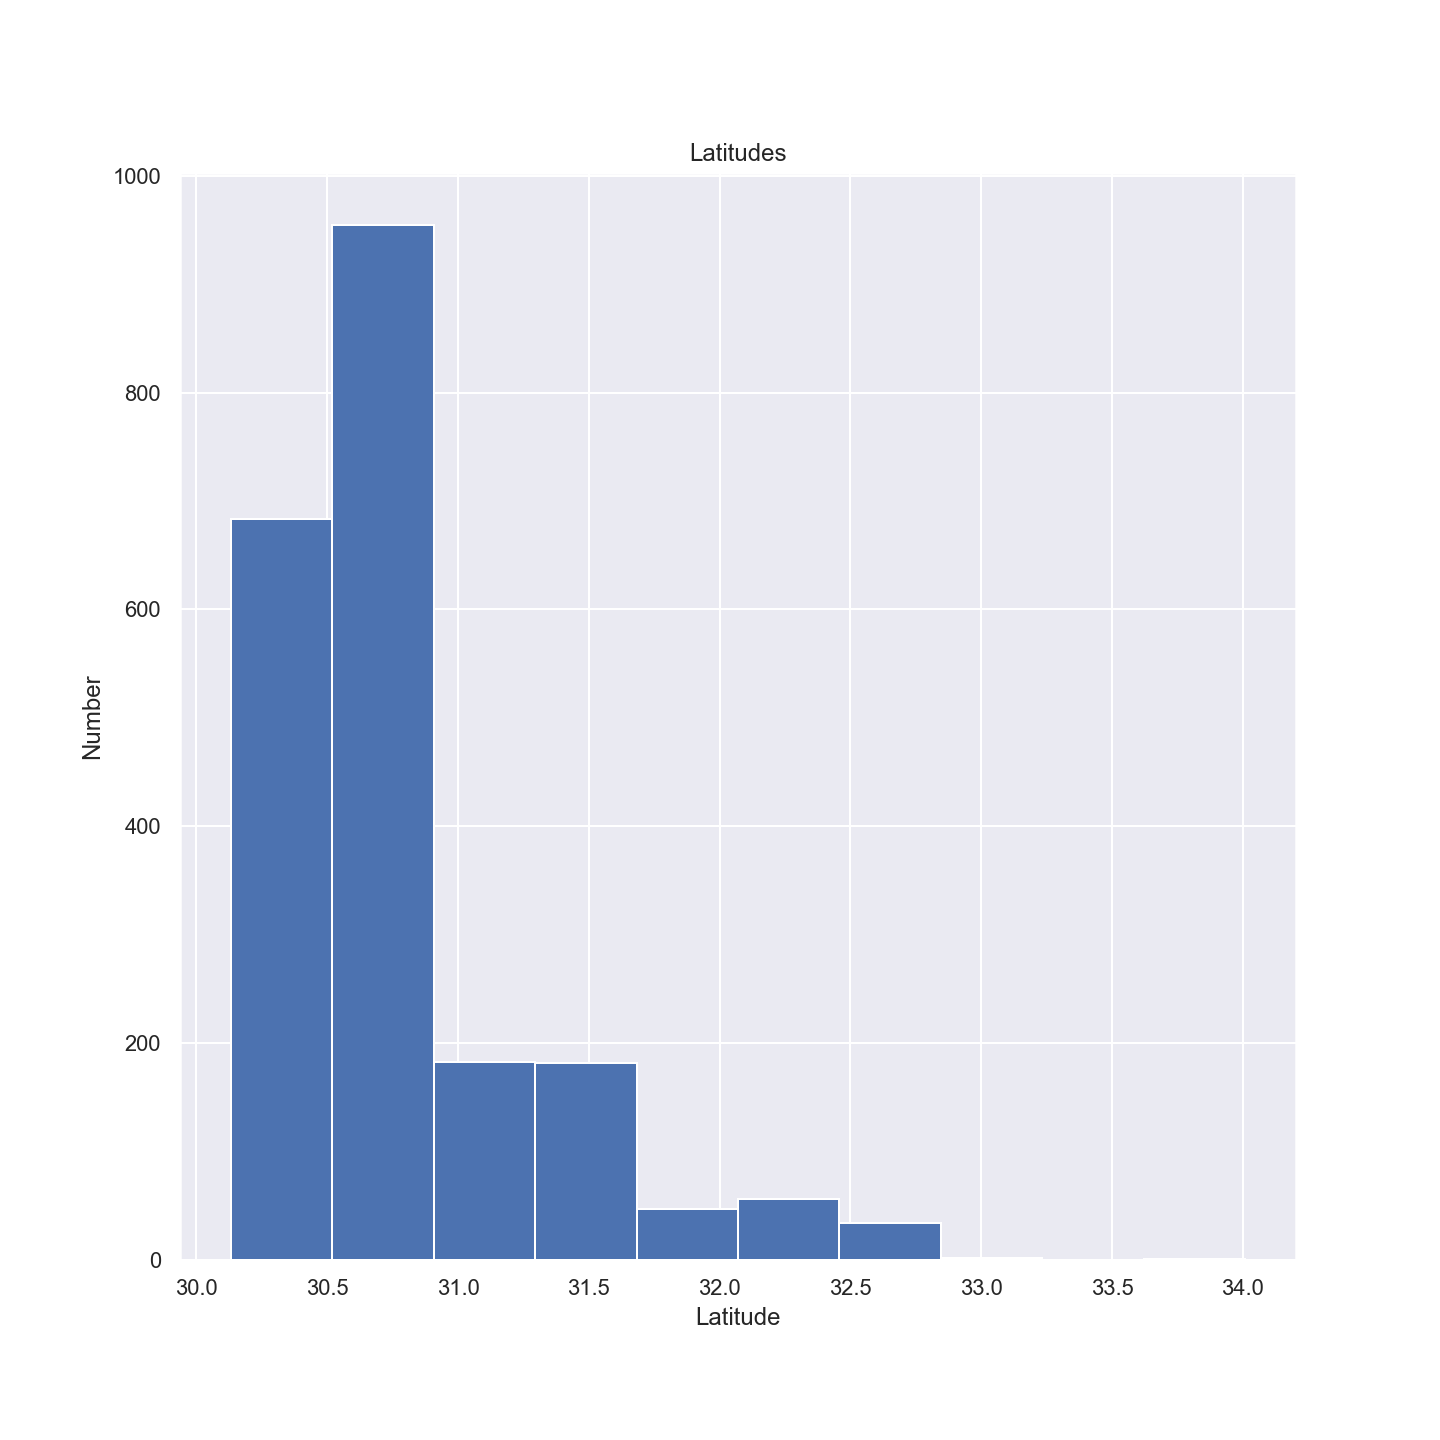

In [189]:
fig1 = plt.figure()
plt.hist(lat)
plt.title('Latitudes')
plt.xlabel('Latitude')
plt.ylabel('Number');

<IPython.core.display.Javascript object>


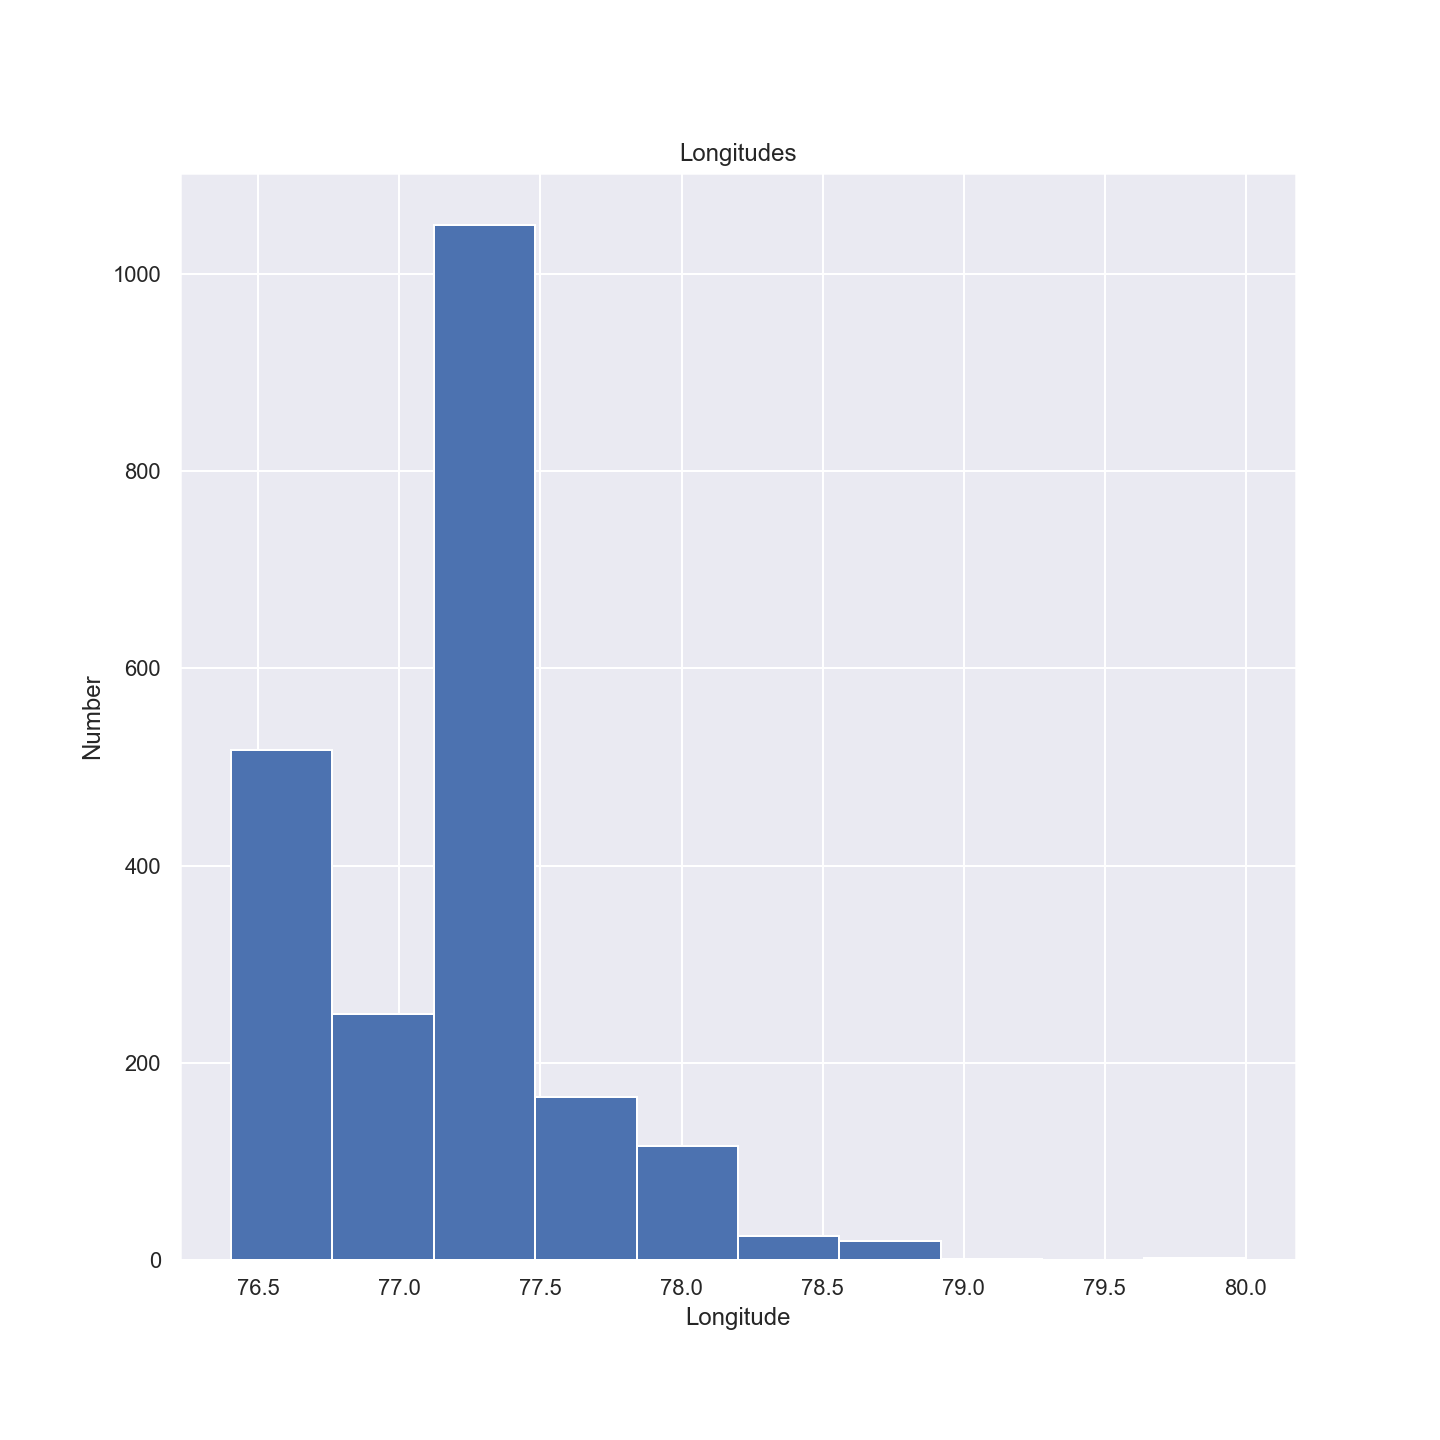

In [190]:
fig2 = plt.figure()
plt.hist(lon)
plt.title('Longitudes')
plt.xlabel('Longitude')
plt.ylabel('Number');

In [201]:
data16 = pd.read_csv('SHC_Haryana_16.csv')
oc16 = np.array(data16['Organic Carbon (OC)'])
print(oc16)

[0.3  0.31 0.4  ... 0.31 0.37 0.28]


In [202]:
data17 = pd.read_csv('SHC_Haryana_17.csv')
oc17 = np.array(data17['Organic Carbon (OC)'])
print(oc17)

[0.31 0.43 0.4  0.3  0.43 0.31 0.33 0.34 0.34 0.43 0.36 0.33 0.28 0.34
 0.33 0.4  0.31 0.34 0.27 0.25 0.27 0.34 0.37 0.4  0.33 0.3  0.28 0.4
 0.31 0.25 0.28 0.27 0.25 0.36 0.33 0.25 0.39 0.3  0.36 0.33 0.44 0.34
 0.27 0.27 0.27 0.34 0.31 0.27 0.3  0.34 0.34 0.28 0.33 0.27 0.28 0.33
 0.33]


In [203]:
data18 = pd.read_csv('SHC_Haryana_18.csv')
oc18 = np.array(data18['Organic Carbon (OC)'])
print(oc18)

[0.29 0.38 0.33 0.3  0.51 0.45 0.27 0.47 0.45 0.48 0.47 0.58 0.56 0.47
 0.58 0.58 0.51 0.55 0.58 0.47 0.58 0.47 0.53 0.55 0.54 0.54 0.5  0.51
 0.48 0.56 0.51 0.56 0.5  0.54 0.54 0.5  0.47 0.58 0.47 0.49 0.54 0.53
 0.53 0.49 0.58 0.53 0.55 0.54 0.58 0.47 0.53 0.54 0.48 0.56 0.56 0.58
 0.56 0.51 0.43 0.37 0.46 0.44 0.56 0.57 0.42 0.56 0.58 0.4  0.61 0.58
 0.44 0.56 0.49 0.53 0.51 0.5  0.48 0.51 0.42 0.39 0.55 0.55 0.46 0.53
 0.46 0.36 0.51 0.58 0.57 0.57 0.56 0.56 0.31 0.53 0.52 0.48 0.54 0.37
 0.53 0.53 0.44 0.48 0.56 0.53 0.56 0.53 0.47 0.49 0.53 0.43 0.56 0.55
 0.58 0.31 0.18 0.19 0.18 0.19 0.27 0.33 0.25 0.25 0.24 0.18 0.49 0.56
 0.53 0.58 0.51 0.54 0.47 0.56 0.56 0.39 0.53 0.57 0.52 0.48 0.53 0.52
 0.53 0.49 0.54 0.54 0.53 0.54 0.48 0.52 0.54 0.47 0.56 0.54 0.53 0.55
 0.53 0.57 0.48 0.53 0.56 0.55 0.59 0.53 0.56 0.48 0.47 0.43 0.39 0.53
 0.53 0.57 0.53 0.59 0.41 0.54 0.47 0.48 0.53 0.48 0.47 0.48 0.53 0.48
 0.57 0.47 0.48 0.56 0.56 0.57 0.54 0.54 0.56 0.53 0.56 0.5  0.53 0.56
 0.39 

In [207]:
print("Mean OC in 2016-17:  ", oc16.mean())
print("Standard deviation:  ", oc16.std())
print("Minimum OC:          ", oc16.min())
print("Maximum OC:          ", oc16.max())

Mean OC in 2016-17:   0.33632298136645966
Standard deviation:   0.12733686933379734
Minimum OC:           0.12
Maximum OC:           0.9


In [208]:
print("Mean OC in 2017-18:       ", oc17.mean())
print("Standard deviation:       ", oc17.std())
print("Minimum OC:               ", oc17.min())
print("Maximum OC:               ", oc17.max())

Mean OC in 2017-18:        0.3247368421052631
Standard deviation:        0.049810351321784824
Minimum OC:                0.25
Maximum OC:                0.44


In [209]:
print("Mean OC in 2018-19:       ", oc18.mean())
print("Standard deviation:       ", oc18.std())
print("Minimum OC:               ", oc18.min())
print("Maximum OC:               ", oc18.max())

Mean OC in 2018-19:        0.47636554621848737
Standard deviation:        0.09293320537717632
Minimum OC:                0.18
Maximum OC:                0.61


<IPython.core.display.Javascript object>


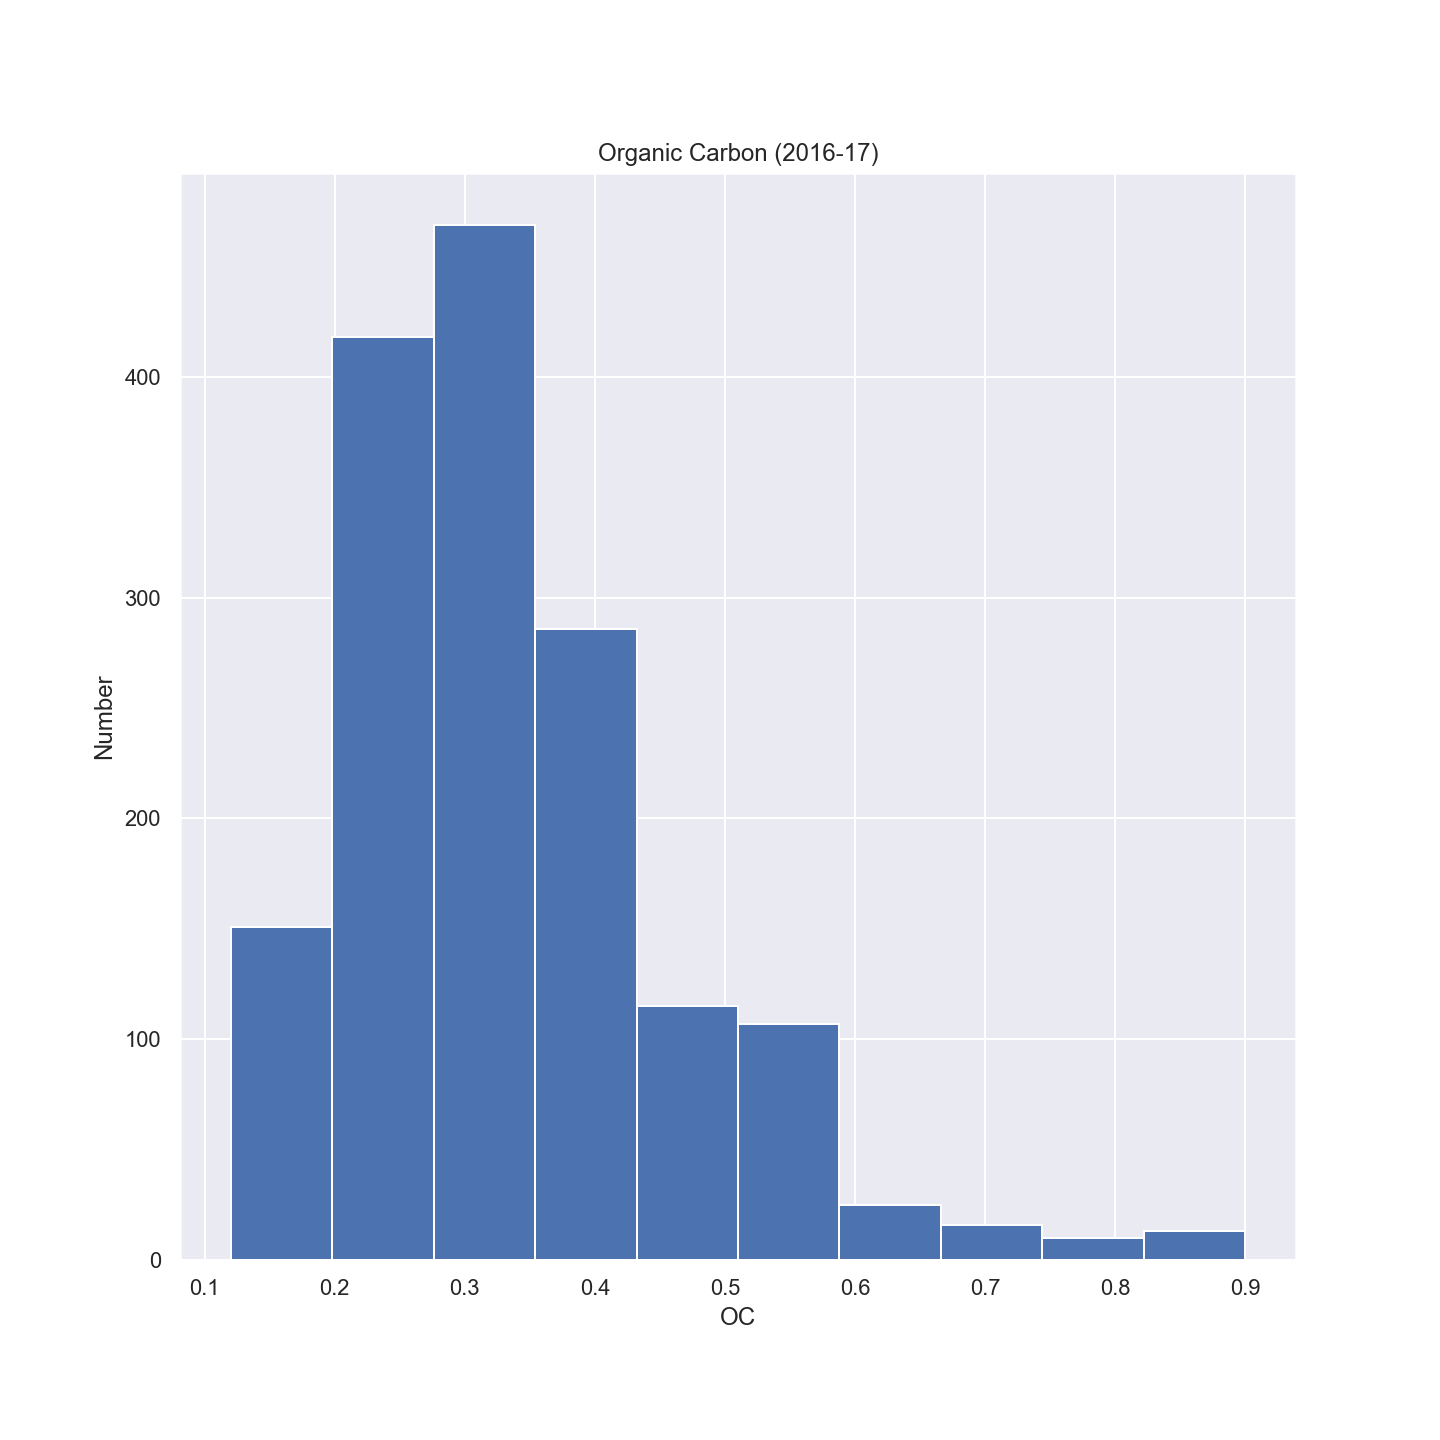

In [210]:
fig3 = plt.figure()
plt.hist(oc16)
plt.title('Organic Carbon (2016-17)')
plt.xlabel('OC')
plt.ylabel('Number');

<IPython.core.display.Javascript object>


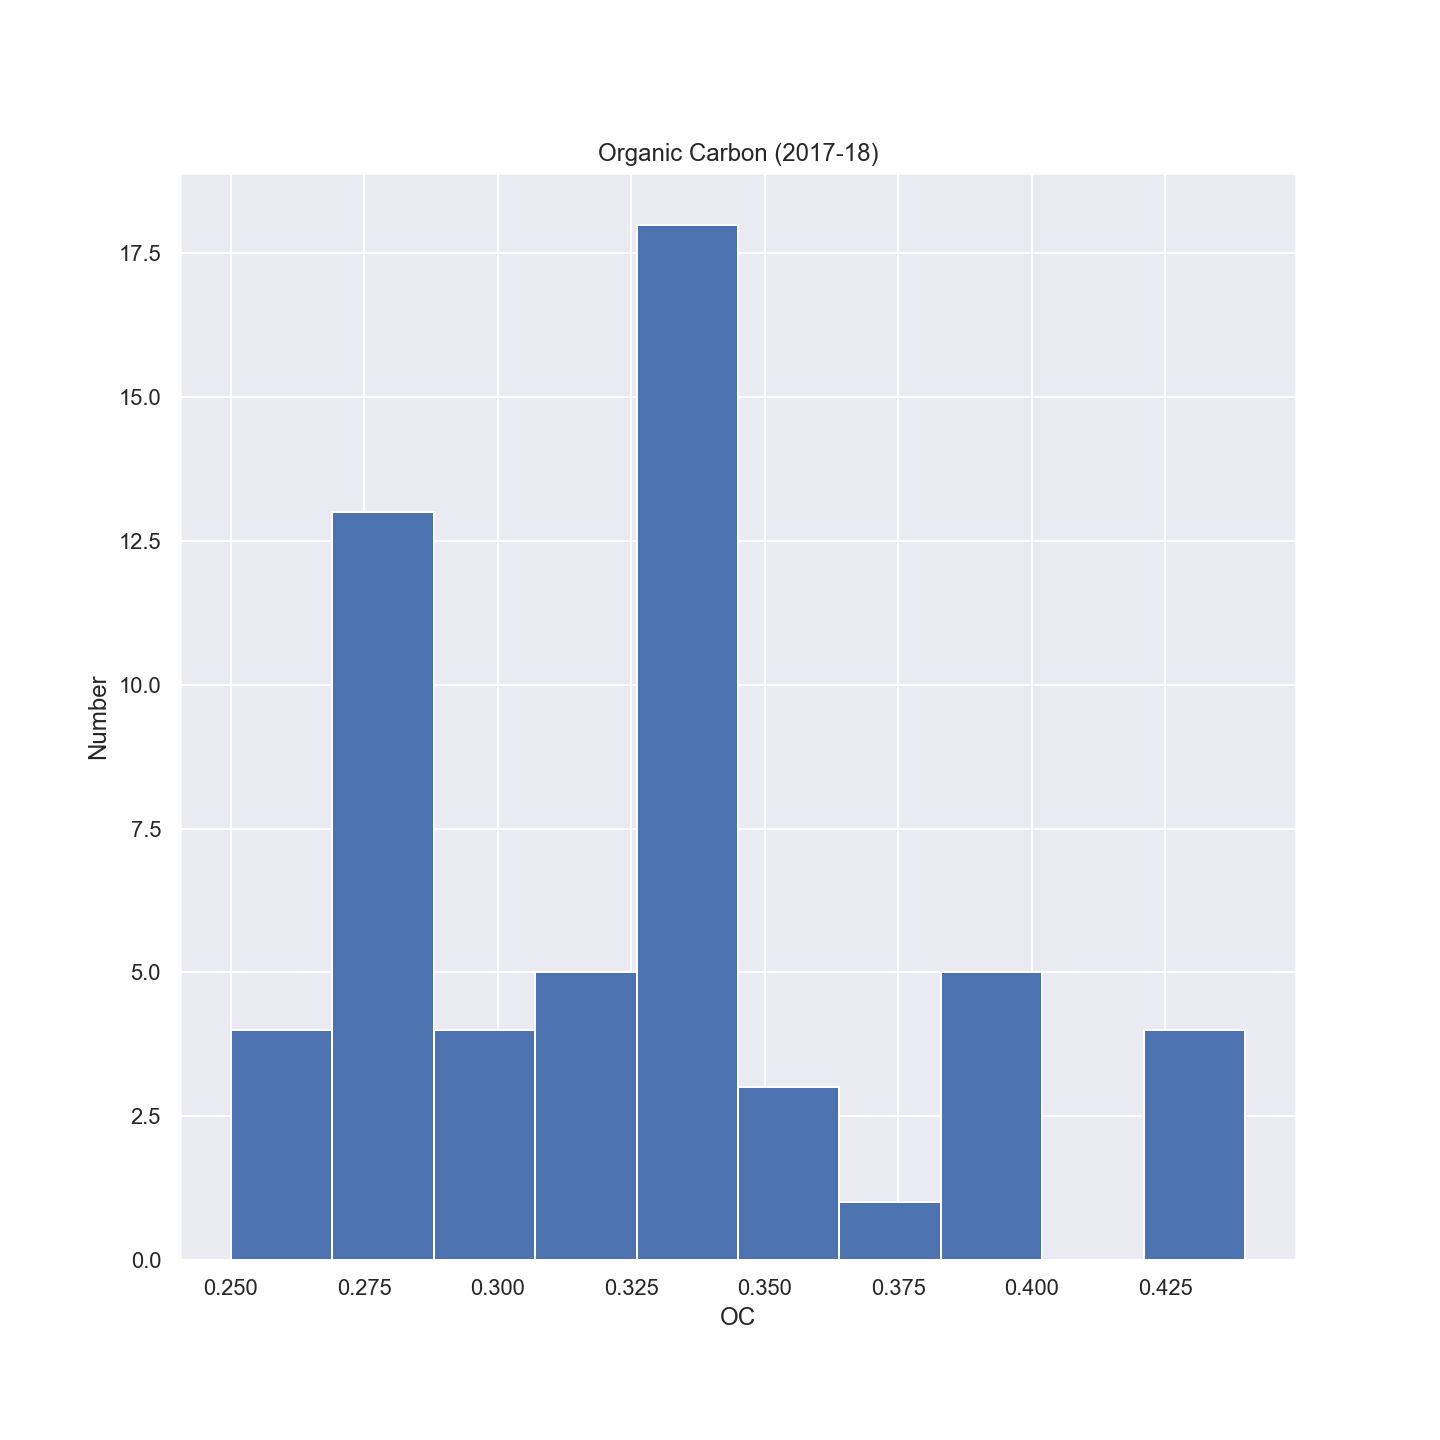

In [211]:
fig4 = plt.figure()
plt.hist(oc17)
plt.title('Organic Carbon (2017-18)')
plt.xlabel('OC')
plt.ylabel('Number');

<IPython.core.display.Javascript object>


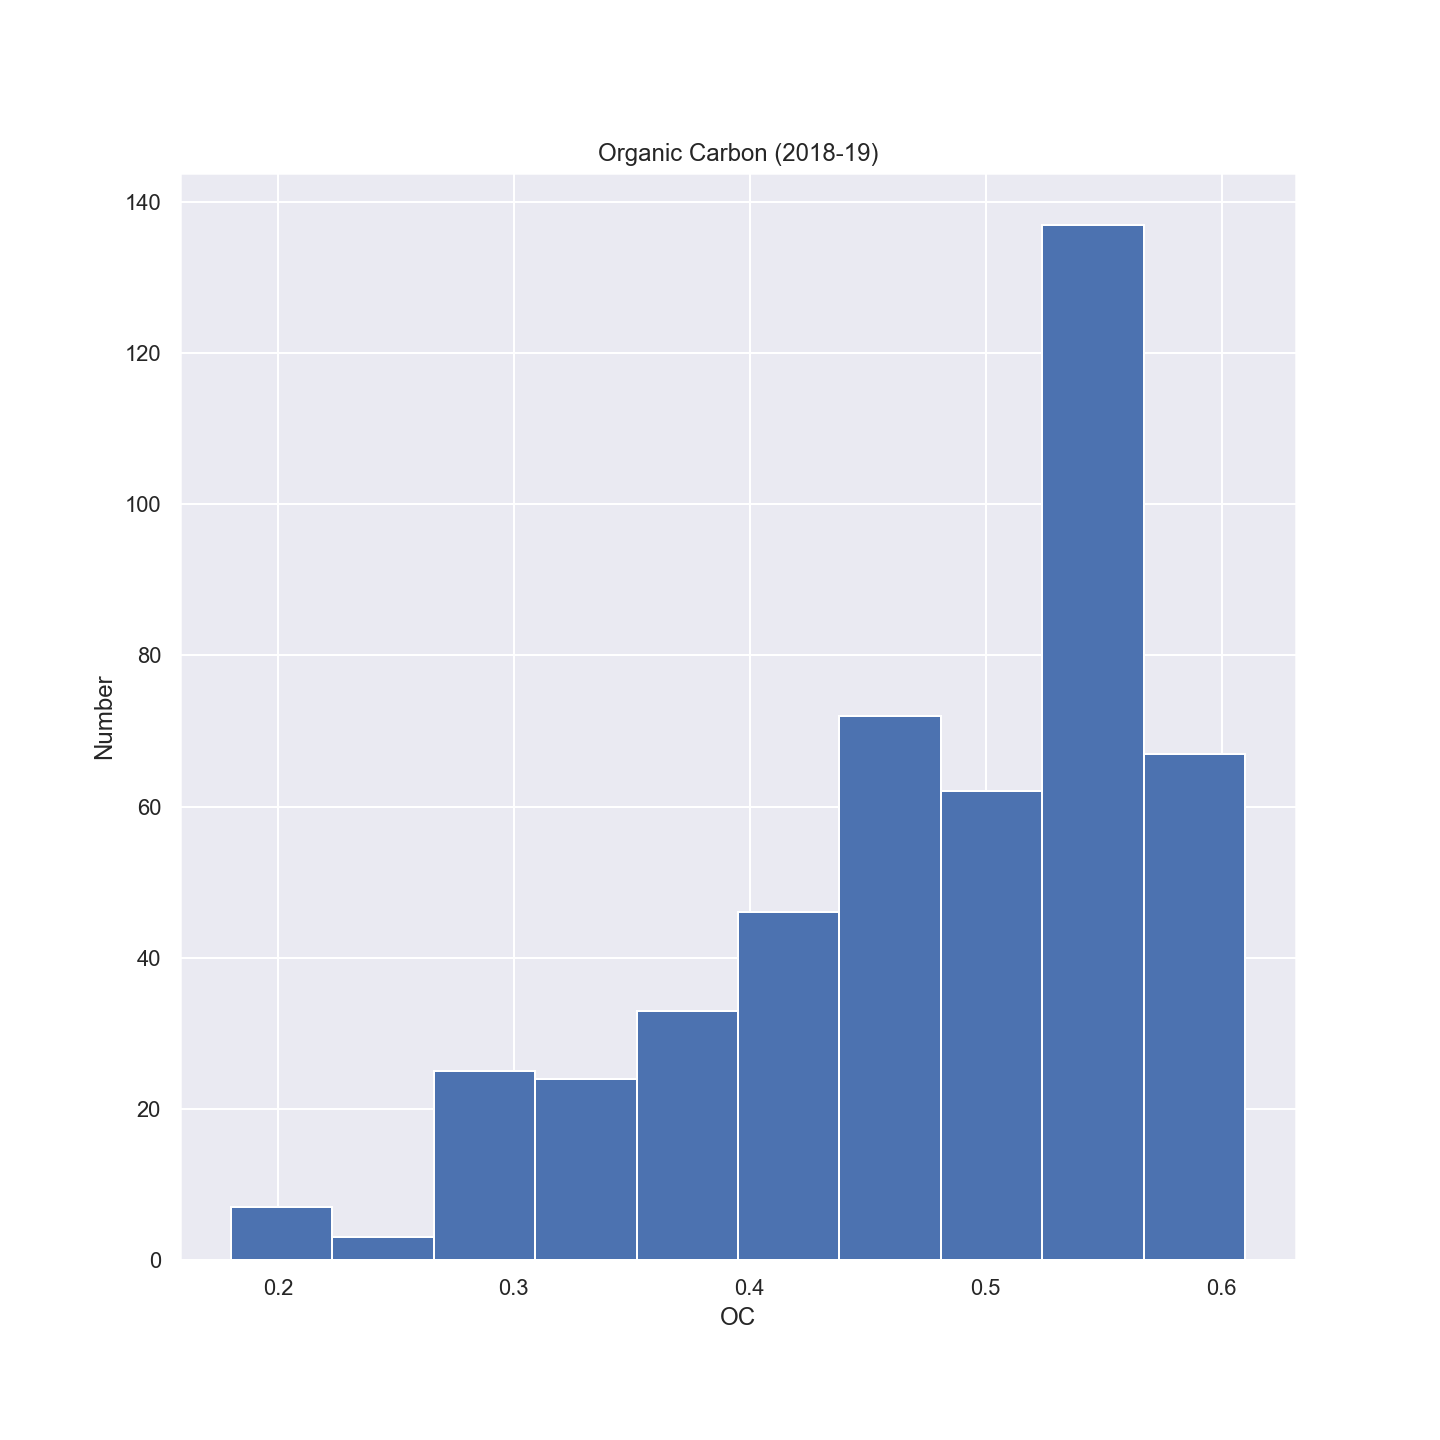

In [212]:
fig5 = plt.figure()
plt.hist(oc18)
plt.title('Organic Carbon (2018-19)')
plt.xlabel('OC')
plt.ylabel('Number');

In [151]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import numpy as np

In [152]:
rawDump = np.array(pd.read_csv("shc_data.csv", header=None))

data = rawDump[1:, 1:]

data

array([['31.312501', '77.551390', '0.30'],
       ['31.280279', '77.498612', '0.31'],
       ['30.884723', '78.112501', '0.40'],
       ...,
       ['30.151380', '76.671230', '0.56'],
       ['30.563300', '77.208000', '0.37'],
       ['30.563300', '77.208000', '0.28']], dtype=object)

In [153]:
root_grp = Dataset('try.nc', 'w', format='NETCDF4')

In [154]:
root_grp.description = 'MFCC data'
root_grp.createDimension("MFCC", data.shape[0])
mfccvariables = []
for i in range(data.shape[1]):
    mfccvariables.append(root_grp.createVariable('mfcc' + str(i), 'd', ('MFCC',)))
for i in range(len(mfccvariables)):
    mfccvariables[i][:] = data[:, i]
root_grp.close()

In [155]:
data = Dataset('try.nc')

In [162]:
data.variables.keys() #lat long oc

dict_keys(['mfcc0', 'mfcc1', 'mfcc2'])

In [163]:
lons = data.variables['mfcc1'][:] #mfcc1 are the Longitude Values
lons

masked_array(data=[77.55139 , 77.498612, 78.112501, ..., 76.67123 ,
                   77.208   , 77.208   ],
             mask=False,
       fill_value=1e+20)

In [164]:
lats = data.variables['mfcc0'][:] #mfcc0 are the Latitude Values
lats

masked_array(data=[31.312501, 31.280279, 30.884723, ..., 30.15138 ,
                   30.5633  , 30.5633  ],
             mask=False,
       fill_value=1e+20)

In [165]:
oc = data.variables['mfcc2'][:]  #mfc22 are the Organic Carbon values
oc

masked_array(data=[0.3 , 0.31, 0.4 , ..., 0.56, 0.37, 0.28],
             mask=False,
       fill_value=1e+20)